### Finansal Genellemelerin Analiz Edilmesi | Korelasyon

Korelasyon, istatistiksel bir terimdir ve iki değişken arasında anlamlı bir ilişki olup olmadığı, ilişkinin yönü ve şiddeti hakkında bize birtakım istatistiki bilgiler sağlar. Korelasyon katsayısı ise, genellikle -1 ile +1 arasında değerler alır:

- **Mükemmel pozitif korelasyon:** +1 değerini alır. İki değişken arasında doğrusal bir ilişki vardır; bir değişken arttığında diğeri de artar.

- **Mükemmel negatif korelasyon:** -1 değerini alır. İki değişken arasında doğrusal bir ilişki vardır; bir değişken arttığında diğeri de azalır.

- **Korelasyon yok:** 0 değerini alır. İki değişken arasında anlamlı herhangi bir ilişki yoktur.

In [1]:
# Gerekli kütüphane ve fonksiyonların kurulması

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import missingno as msno

import scipy.stats
from itertools import combinations

import warnings
warnings.filterwarnings("ignore")

In [2]:
dictionary = {"a": [1, 2, 3, 4, 5], "b": [1, 2, 3, 4, 5]}

df = pd.DataFrame(dictionary)

df

,a,b
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [3]:
# çapraz korelasyon tablosu, değişkenlerin hem kendileri ile hem de birbirleriyle olan ilişkilerini ifade etmektedir.
    
df.corr()

,a,b
a,1.0,1.0
b,1.0,1.0


In [4]:
dictionary_2 = {"a": [1, 2, 3, 4, 5], "b": [5, 4, 3, 2, 1]}

df = pd.DataFrame(dictionary_2)

df

,a,b
0,1,5
1,2,4
2,3,3
3,4,2
4,5,1


In [5]:
df.corr()

,a,b
a,1.0,-1.0
b,-1.0,1.0


#### Ticker Descriptions


**TRY = X** USD/TRY

**EUR TRY = X** EUR/TRY

**GBP TRY = X** GPB/TRY

**XU100.IS** BIST 100

**DAX** Global X DAX Germany ETF

**GC = F** Gold ONS

**^GSPC** S&P500

#### Import Data

In [6]:
tickers = ["TRY=X", "EURTRY=X", "GBPTRY=X", "XU100.IS", "DAX", "GC=F", "^GSPC"]

start_date = '2015-01-01'

end_date = '2017-01-01'

panel_data = yf.download(tickers, start = start_date, end = end_date, progress = False)

panel_data.head()

Price       Adj Close                                                        \
Ticker            DAX EURTRY=X GBPTRY=X         GC=F    TRY=X      XU100.IS   
Date                                                                          
2015-01-01        NaN  2.82487   3.6379          NaN  2.33116           NaN   
2015-01-02  21.189384  2.81987   3.6338  1186.000000  2.33098  85458.898438   
2015-01-05  20.150280  2.79728   3.5788  1203.900024  2.34224  86462.601562   
2015-01-06  20.150280  2.78208   3.5559  1219.300049  2.33075  86909.601562   
2015-01-07  20.150280  2.75848   3.5162  1210.599976  2.32361  86776.601562   

Price                        Close                    ...     Open  \
Ticker            ^GSPC        DAX EURTRY=X GBPTRY=X  ...    TRY=X   
Date                                                  ...            
2015-01-01          NaN        NaN  2.82487   3.6379  ...  2.33116   
2015-01-02  2058.199951  26.163000  2.81987   3.6338  ...  2.33098   
2015-01-05  2020.579956  24.879999  2.79728   3.5788  ...  2.34224   
2015-01-06  2002.609985  24.879999  2.78208   3.5559  ...  2.33075   
2015-01-07  2025.900024  24.879999  2.75848   3.5162  ...  2.32474   

Price                                  Volume                                 \
Ticker          XU100.IS        ^GSPC     DAX EURTRY=X GBPTRY=X   GC=F TRY=X   
Date                                                                           
2015-01-01           NaN          NaN     NaN        0        0    NaN     0   
2015-01-02  85447.898438  2058.899902     0.0        0        0  138.0     0   
2015-01-05  85495.296875  2054.439941  2700.0        0        0  470.0     0   
2015-01-06  86650.898438  2022.150024     0.0        0        0   97.0     0   
2015-01-07  86925.101562  2005.550049   100.0        0        0   29.0     0   

Price                                  
Ticker         XU100.IS         ^GSPC  
Date                                   
2015-01-01          NaN           NaN  
2015-01-02  328037000.0  2.708700e+09  
2015-01-05  644588000.0  3.799120e+09  
2015-01-06  698321000.0  4.460110e+09  
2015-01-07  791949000.0  3.805480e+09  

[5 rows x 42 columns]

In [7]:
panel_data.shape

(522, 42)

In [8]:
df = panel_data["Close"].reset_index()

df.head()

Ticker,Date,DAX,EURTRY=X,GBPTRY=X,GC=F,TRY=X,XU100.IS,^GSPC
0,2015-01-01,NaN,2.82487,3.6379,NaN,2.33116,NaN,NaN
1,2015-01-02,26.163000,2.81987,3.6338,1186.000000,2.33098,85458.898438,2058.199951
2,2015-01-05,24.879999,2.79728,3.5788,1203.900024,2.34224,86462.601562,2020.579956
3,2015-01-06,24.879999,2.78208,3.5559,1219.300049,2.33075,86909.601562,2002.609985
4,2015-01-07,24.879999,2.75848,3.5162,1210.599976,2.32361,86776.601562,2025.900024


In [9]:
df.shape

(522, 8)

In [10]:
df.rename(columns = {"TRY=X"    : "USD_TRY",
                     "EURTRY=X" : "EUR_TRY",
                     "GBPTRY=X" : "GDP_TRY",
                     "XU100.IS" : "BIST100",
                     "DAX"      : "DAX",
                     "GC=F"     : "GOLD",
                     "^GSPC"    : "SP500"}, inplace = True)

df.head()

Ticker,Date,DAX,EUR_TRY,GDP_TRY,GOLD,USD_TRY,BIST100,SP500
0,2015-01-01,NaN,2.82487,3.6379,NaN,2.33116,NaN,NaN
1,2015-01-02,26.163000,2.81987,3.6338,1186.000000,2.33098,85458.898438,2058.199951
2,2015-01-05,24.879999,2.79728,3.5788,1203.900024,2.34224,86462.601562,2020.579956
3,2015-01-06,24.879999,2.78208,3.5559,1219.300049,2.33075,86909.601562,2002.609985
4,2015-01-07,24.879999,2.75848,3.5162,1210.599976,2.32361,86776.601562,2025.900024


#### NA Operations

Finansal verilerde hafta sonu ve çeşitli bayram tatillerinde piyasaların kapalı olması nedeniyle zaman zaman eksiklikler yaşanabilir. Bu eksik verilerle başa çıkmak için Pandas kütüphanesinde yer alan NA (Not Available) işlemleri kullanılabilir.

In [11]:
df.isnull().sum()

Ticker
Date        0
DAX        18
EUR_TRY     0
GDP_TRY     0
GOLD       20
USD_TRY     0
BIST100    18
SP500      18
dtype: int64

<Axes: >

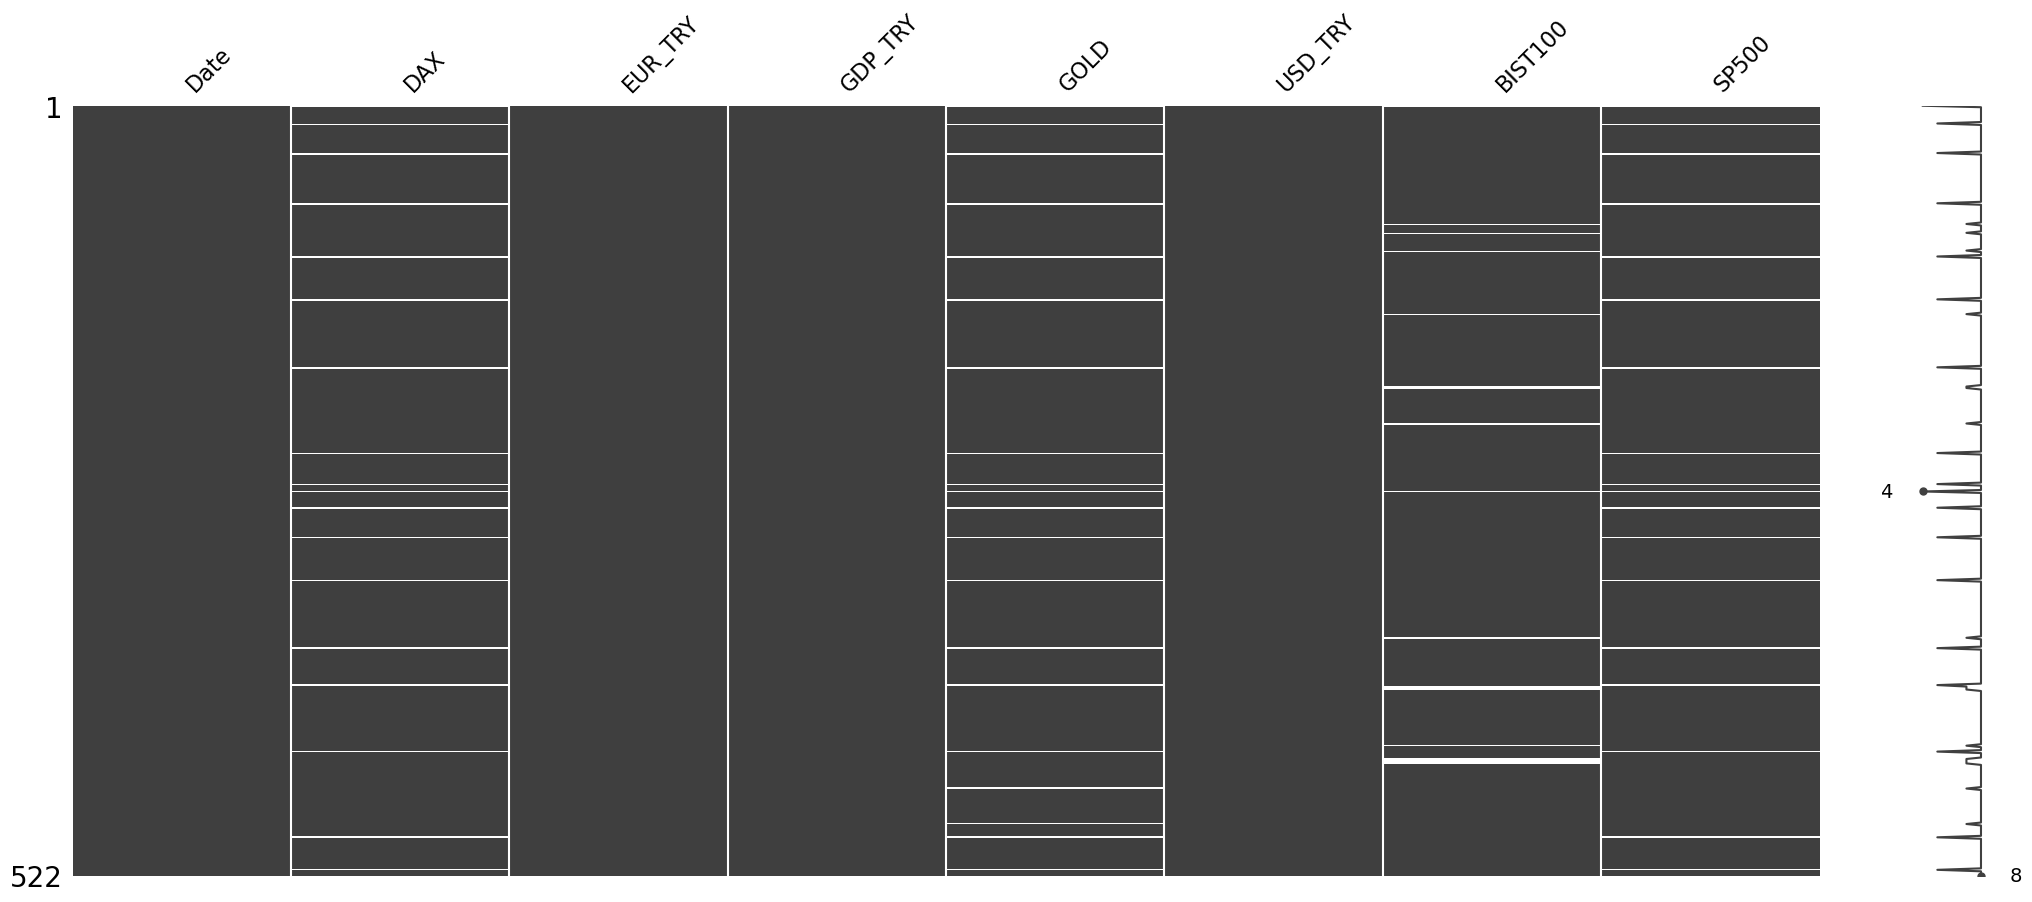

In [12]:
msno.matrix(df)

**Not:** Burada ise dataframe içerisinde yer alan eksik değerleri 1 gün öncesine ait dolu olan gözlem değerlerleri ile dolduruyoruz.

In [13]:
df.fillna(method = 'bfill', inplace = True) 

df.isnull().sum()

Ticker
Date       0
DAX        0
EUR_TRY    0
GDP_TRY    0
GOLD       0
USD_TRY    0
BIST100    0
SP500      0
dtype: int64

In [14]:
df.dropna(inplace = True)

df.isnull().sum()

Ticker
Date       0
DAX        0
EUR_TRY    0
GDP_TRY    0
GOLD       0
USD_TRY    0
BIST100    0
SP500      0
dtype: int64

#### Relationship Analysis

**Correlation**

Aşağıdaki korelasyon tablosu incelendiğinde, **UDS_TRY** bir birim yükseldiğinde **BIST100**'de de yaklaşık %70'lik bir düşüş meydana gelmektedir. Ardından **Altın** ve **USD_TRY** arasında 0'ya yakın bir ilişki bulunmaktadır. Yani bu iki veri seti bağımsız denecek kadar farklılıklar vardır.

In [15]:
df.corr()

Ticker,DAX,EUR_TRY,GDP_TRY,GOLD,USD_TRY,BIST100,SP500
Ticker,,,,,,,
DAX,1.000000,-0.680648,-0.258350,-0.178724,-0.592334,0.630234,0.334554
EUR_TRY,-0.680648,1.000000,0.459571,0.095730,0.959193,-0.680196,0.191785
GDP_TRY,-0.258350,0.459571,1.000000,-0.661845,0.480249,-0.558311,-0.310778
GOLD,-0.178724,0.095730,-0.661845,1.000000,-0.034632,0.227318,0.339043
USD_TRY,-0.592334,0.959193,0.480249,-0.034632,1.000000,-0.697802,0.260367
BIST100,0.630234,-0.680196,-0.558311,0.227318,-0.697802,1.000000,0.238221
SP500,0.334554,0.191785,-0.310778,0.339043,0.260367,0.238221,1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

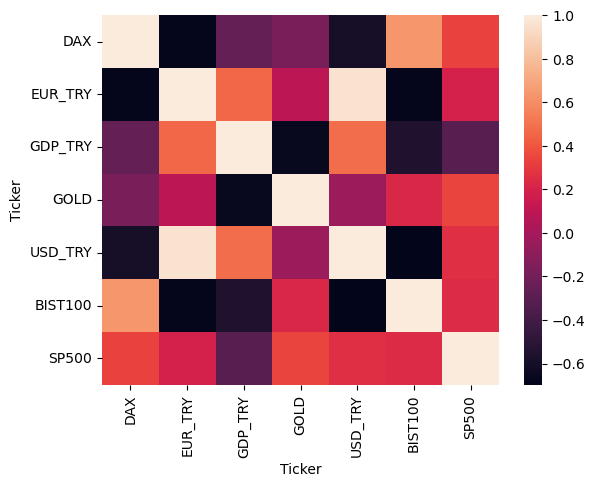

In [16]:
sns.heatmap(df.corr())

<Axes: xlabel='Ticker', ylabel='Ticker'>

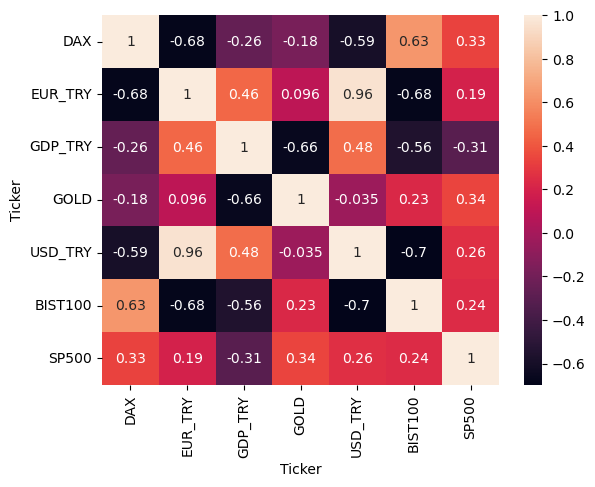

In [17]:
sns.heatmap(df.corr("pearson"), annot = True)

#### Correlation Test

**H0:** Correlation between variables is not significant

**H1:** Correlation between variables is significant

In [18]:
df.columns

Index(['Date', 'DAX', 'EUR_TRY', 'GDP_TRY', 'GOLD', 'USD_TRY', 'BIST100',
       'SP500'],
      dtype='object', name='Ticker')

In [19]:
col_names = list(df.columns[1:]) # Date değişkeni, col_names listesi içerisine alınmadı.

col_names

['DAX', 'EUR_TRY', 'GDP_TRY', 'GOLD', 'USD_TRY', 'BIST100', 'SP500']

In [20]:
# combinations fonksiyonunun gerçekleştirdiği işleme, yerine koymadan yapılan örnekleme yöntemi de denmektedir.

comb = list(combinations(col_names, 2)) 

binary_selections = [list(i) for i in set(tuple(i) for i in comb)]

binary_selections

[['EUR_TRY', 'SP500'],
 ['GOLD', 'SP500'],
 ['DAX', 'SP500'],
 ['EUR_TRY', 'USD_TRY'],
 ['GOLD', 'USD_TRY'],
 ['DAX', 'USD_TRY'],
 ['DAX', 'BIST100'],
 ['EUR_TRY', 'BIST100'],
 ['GDP_TRY', 'SP500'],
 ['GOLD', 'BIST100'],
 ['GDP_TRY', 'USD_TRY'],
 ['DAX', 'EUR_TRY'],
 ['USD_TRY', 'SP500'],
 ['GDP_TRY', 'BIST100'],
 ['BIST100', 'SP500'],
 ['USD_TRY', 'BIST100'],
 ['DAX', 'GOLD'],
 ['EUR_TRY', 'GOLD'],
 ['EUR_TRY', 'GDP_TRY'],
 ['DAX', 'GDP_TRY'],
 ['GDP_TRY', 'GOLD']]

In [21]:
df[binary_selections[1]]

Ticker,GOLD,SP500
0,1186.000000,2058.199951
1,1186.000000,2058.199951
2,1203.900024,2020.579956
3,1219.300049,2002.609985
4,1210.599976,2025.900024
...,...,...
517,1137.300049,2268.879883
518,1137.300049,2268.879883
519,1139.400024,2249.919922
520,1156.400024,2249.260010


**Not:** Bir verinin normal dağılması durumunda aslında çoğu istatistiksel varsayım sağlanmaktadır. Çünkü, insan davranışları ve doğanın hareketi gibi diğer birçok değişken doğada normal dağılıma eğilimli olarak çalışmaktadır. 

**Pearson:** Parametric test/analysis

**Spearman:** Nonparametric test/analysis

**Kendall Tau:** Nonparametric test/analysis

In [22]:
for j in range(0, len(binary_selections)):
    df_temp = df[binary_selections[j]]
    print(df_temp.columns[0] + " | " + df_temp.columns[1], " | p_value:", scipy.stats.pearsonr(df_temp.iloc[:, 0], df_temp.iloc[:, 1])[1])  

EUR_TRY | SP500  | p_value: 1.0228135044805533e-05
GOLD | SP500  | p_value: 1.655222574416088e-15
DAX | SP500  | p_value: 4.0699730760910565e-15
EUR_TRY | USD_TRY  | p_value: 1.959149391094995e-287
GOLD | USD_TRY  | p_value: 0.4297666845378639
DAX | USD_TRY  | p_value: 9.501484083435895e-51
DAX | BIST100  | p_value: 3.8804056585776387e-59
EUR_TRY | BIST100  | p_value: 3.7447004656065884e-72
GDP_TRY | SP500  | p_value: 3.756360336724907e-13
GOLD | BIST100  | p_value: 1.5206786292654908e-07
GDP_TRY | USD_TRY  | p_value: 1.7921739747102321e-31
DAX | EUR_TRY  | p_value: 2.77831542970191e-72
USD_TRY | SP500  | p_value: 1.5517634949683392e-09
GDP_TRY | BIST100  | p_value: 4.1252502499108464e-44
BIST100 | SP500  | p_value: 3.605396306678876e-08
USD_TRY | BIST100  | p_value: 2.2156744575015644e-77
DAX | GOLD  | p_value: 4.0136400307496776e-05
EUR_TRY | GOLD  | p_value: 0.028745631633002273
EUR_TRY | GDP_TRY  | p_value: 1.2273115890168479e-28
DAX | GDP_TRY  | p_value: 2.0925969474742473e-09
GDP

Aşağıdak heatmapden'de görüleceği üzere, "USD_TRY" ile "GOLD" arasında anlamlı bir korelasyon görülmemektedir. 

<Axes: xlabel='Ticker', ylabel='Ticker'>

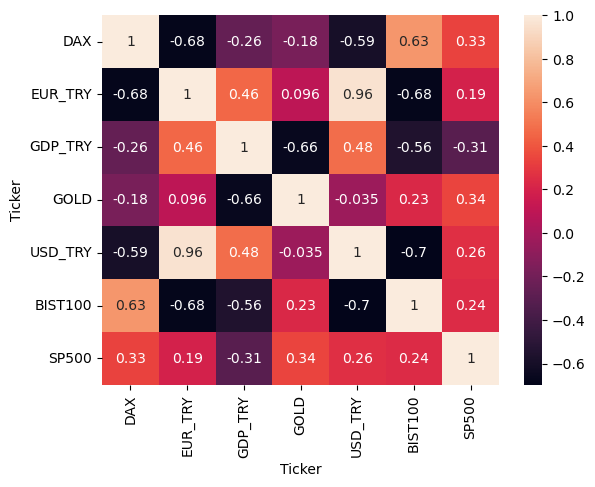

In [23]:
sns.heatmap(df.corr("pearson"), annot = True)

In [24]:
for i in range(1, (df.shape[1]) - 1):
    print(df.columns[5] + " | " + df.columns[i], " | p_value:", scipy.stats.spearmanr(df.iloc[:, 1], df.iloc[:, i+1])[1])

USD_TRY | DAX  | p_value: 1.7344810221713474e-65
USD_TRY | EUR_TRY  | p_value: 9.167098927161235e-08
USD_TRY | GDP_TRY  | p_value: 7.46849303343724e-07
USD_TRY | GOLD  | p_value: 1.7566161869216168e-68
USD_TRY | USD_TRY  | p_value: 3.5749966216747445e-58
USD_TRY | BIST100  | p_value: 5.326837212055486e-13


<Axes: xlabel='Ticker', ylabel='Ticker'>

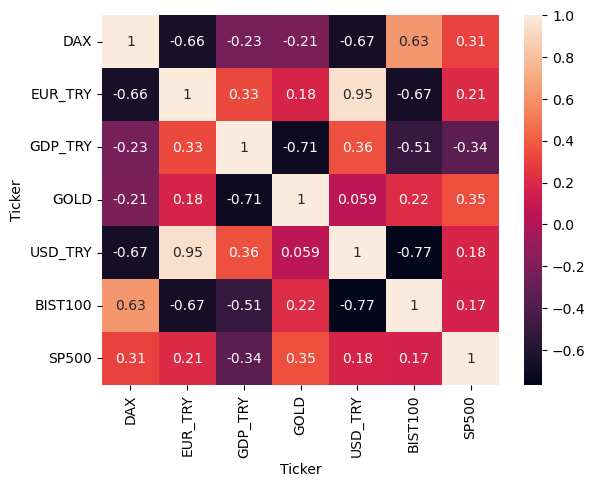

In [25]:
sns.heatmap(df.corr("spearman"), annot = True)

In [26]:
for i in range(1, (df.shape[1]) - 1):
    print(df.columns[5] + " | " + df.columns[i], " | p_value:", scipy.stats.kendalltau(df.iloc[:, 1], df.iloc[:, i+1])[1])

USD_TRY | DAX  | p_value: 3.510765317788103e-51
USD_TRY | EUR_TRY  | p_value: 6.794880698755625e-08
USD_TRY | GDP_TRY  | p_value: 7.62279236473615e-05
USD_TRY | GOLD  | p_value: 2.467299483462177e-54
USD_TRY | USD_TRY  | p_value: 3.4700832975413994e-51
USD_TRY | BIST100  | p_value: 4.254775450254523e-14


<Axes: xlabel='Ticker', ylabel='Ticker'>

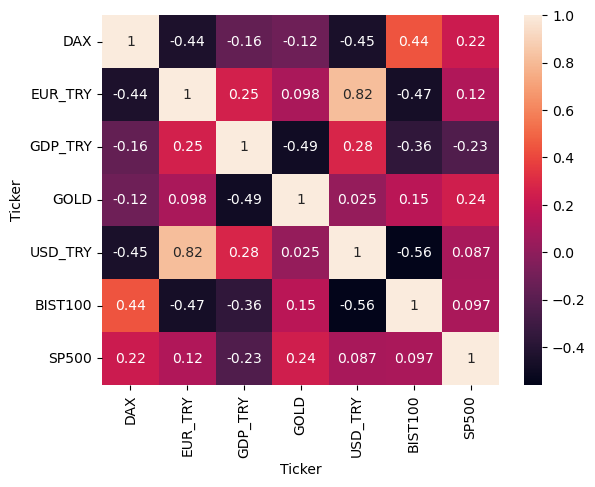

In [27]:
sns.heatmap(df.corr("kendall"), annot = True)

#### KAYNAKLAR

[1] Mustafa Nayansak, Veri Bilimi Okulu, Python ile Finansal Veri Analizi: